#Setup Youtube Transcript

In [ ]:
!pip install youtube_transcript_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import TextFormatter

Test transcribe, takes youtube video id as parameter

In [ ]:
transcript = YouTubeTranscriptApi.get_transcript('wD79NZroV88')

In [ ]:
type(transcript)

list

In [ ]:
transcript[0]

{'text': "This is a bottle of Dasani, Coca-Cola's brand\nof bottled water.",
 'start': 0.0,
 'duration': 3.94}

Function for creating transcript, returns a list 

In [ ]:
def transcribe(youtubeId):
    transcription = YouTubeTranscriptApi.get_transcript(youtubeId)
    return transcription

In [ ]:
transcript = transcribe("wD79NZroV88")

In [ ]:
transcript[0]

{'text': "This is a bottle of Dasani, Coca-Cola's brand\nof bottled water.",
 'start': 0.0,
 'duration': 3.94}

Create text formatter object

In [ ]:
formatter = TextFormatter()

Test text formatter, takes transcript as parameter, returns text

In [ ]:
text = formatter.format_transcript(transcript)

In [ ]:
text

'This is a bottle of Dasani, Coca-Cola\'s brand\nof bottled water.\nIt is basically Coke without the syrup:\nlike most American bottled water,\nit is tap water that\'s been purified\nand then had tiny amounts of minerals\ndeliberately added back into it.\nExcept... not quite.\nThis is a British Dasani bottle\nfrom 2004,\nwhich was the first and last time that you\ncould ever buy Dasani water in the UK.\nAnd the story of why it failed here\nis one of the greatest marketing\ndisaster stories in history.\nBut it wasn\'t until I started researching,\nsearching through newspapers\nand TV shows from 2004,\nthat I found that the tale is a little more\ncomplicated than I thought.\nAnd a little more complicated\nthan a lot of the world thought.\nAnd it starts years earlier.\nThrough most of the 1980s,\n"bottled water" was something expensive that\ngot ordered at fancy restaurants,\nand it was only by the early 90s\nthat it had started to become a thing that\neveryday people might want to buy.\n

Getting "\n" for linebreaks, want to replace with " " (spaces)

In [ ]:
text = text.replace("\n", " ")

In [ ]:
text

'This is a bottle of Dasani, Coca-Cola\'s brand of bottled water. It is basically Coke without the syrup: like most American bottled water, it is tap water that\'s been purified and then had tiny amounts of minerals deliberately added back into it. Except... not quite. This is a British Dasani bottle from 2004, which was the first and last time that you could ever buy Dasani water in the UK. And the story of why it failed here is one of the greatest marketing disaster stories in history. But it wasn\'t until I started researching, searching through newspapers and TV shows from 2004, that I found that the tale is a little more complicated than I thought. And a little more complicated than a lot of the world thought. And it starts years earlier. Through most of the 1980s, "bottled water" was something expensive that got ordered at fancy restaurants, and it was only by the early 90s that it had started to become a thing that everyday people might want to buy. On Christmas Day, 1992, Briti

Function for creating a string from the transcript list

In [ ]:
def transcriptToText(transcript):
  text = formatter.format_transcript(transcript)
  text = text.replace("\n", " ")
  return text

In [ ]:
text = transcriptToText(transcript)

In [ ]:
text

'This is a bottle of Dasani, Coca-Cola\'s brand\nof bottled water.\nIt is basically Coke without the syrup:\nlike most American bottled water,\nit is tap water that\'s been purified\nand then had tiny amounts of minerals\ndeliberately added back into it.\nExcept... not quite.\nThis is a British Dasani bottle\nfrom 2004,\nwhich was the first and last time that you\ncould ever buy Dasani water in the UK.\nAnd the story of why it failed here\nis one of the greatest marketing\ndisaster stories in history.\nBut it wasn\'t until I started researching,\nsearching through newspapers\nand TV shows from 2004,\nthat I found that the tale is a little more\ncomplicated than I thought.\nAnd a little more complicated\nthan a lot of the world thought.\nAnd it starts years earlier.\nThrough most of the 1980s,\n"bottled water" was something expensive that\ngot ordered at fancy restaurants,\nand it was only by the early 90s\nthat it had started to become a thing that\neveryday people might want to buy.\n

Function for fetching YouTubeID from a youtube url

In [ ]:
from urllib.parse import urlparse, parse_qs

In [ ]:
def get_yt_video_id(url):
    if url.startswith(('youtu', 'www')):
        url = 'http://' + url
        
    query = urlparse(url)
    
    if 'youtube' in query.hostname:
        if query.path == '/watch':
            return parse_qs(query.query)['v'][0]
        elif query.path.startswith(('/embed/', '/v/')):
            return query.path.split('/')[2]
    elif 'youtu.be' in query.hostname:
        return query.path[1:]
    else:
        raise ValueError

In [ ]:
videoId = get_yt_video_id("https://www.youtube.com/watch?v=r6sGWTCMz2k&ab_channel=3Blue1Brown")

In [ ]:
videoId

'r6sGWTCMz2k'

#Setup GPT

In [ ]:
! pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.3-py3-none-any.whl size=67489 sha256=81c073747744737263e0e4096b3051200986767859faeae02aa725bf2d4034f1
  Stored in directory: /root/.cache/pip/wheels/fa/6b/ac/76fa8f79ea603d4bd896c0d185e970a7dbfab23df6bb14c351
Successfully built openai


In [ ]:
import openai

In [ ]:
#@title Enter your OpenAI API key here
openai.api_key = 'sk-xxxxxxxx'

In [ ]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt= "Summarize this in 200 words or less:\n\n" + text,
  temperature=0.7,
  max_tokens=300,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=1
)

In [ ]:
type(response)

openai.openai_object.OpenAIObject

In [ ]:
response

<OpenAIObject text_completion id=cmpl-6ctQ6wdDqRNt4M1nsuY91z8jzfjfs at 0x7f6f31f5e810> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nIn 2004, Coca-Cola attempted to launch their brand of bottled water, Dasani, in the United Kingdom. It was essentially purified tap water with minerals added back into it. This was met with some initial success, but ultimately failed due to a combination of factors. One of these was the British public's perception of bottled water as mineral water, which was not what Dasani was. Additionally, marketing for Dasani had some missteps, such as inadvertently using the wrong slogan for the UK market. Finally, a contamination issue caused the recall of all unsold bottles and put an end to the product in the UK. This story is remembered as one of the greatest marketing disasters in history and serves as a cautionary tale for any company attempting to introduce a new product in a foreign ma

In [ ]:
response["choices"][0]["text"]

"\n\nIn 2004, Coca-Cola attempted to launch their brand of bottled water, Dasani, in the United Kingdom. It was essentially purified tap water with minerals added back into it. This was met with some initial success, but ultimately failed due to a combination of factors. One of these was the British public's perception of bottled water as mineral water, which was not what Dasani was. Additionally, marketing for Dasani had some missteps, such as inadvertently using the wrong slogan for the UK market. Finally, a contamination issue caused the recall of all unsold bottles and put an end to the product in the UK. This story is remembered as one of the greatest marketing disasters in history and serves as a cautionary tale for any company attempting to introduce a new product in a foreign market."

Function that takes a text string as a parameter, and returns a summary

In [ ]:
def textToSummary(text):
  response = openai.Completion.create(
      model="text-davinci-003",
      prompt= "Summarize this in 200 words or less:\n\n" + text,
      temperature=0.7,
      max_tokens=400,
      top_p=1.0,
      frequency_penalty=0.0,
      presence_penalty=1
      )
  return response["choices"][0]["text"].replace("\n", " ").strip()

Summarize function, puts all the previous functions together into one, from url to summary

In [ ]:
def summarize(url):
  videoId = get_yt_video_id(url)
  transcript = transcribe(videoId)
  text = transcriptToText(transcript)
  summary = textToSummary(text)
  return summary

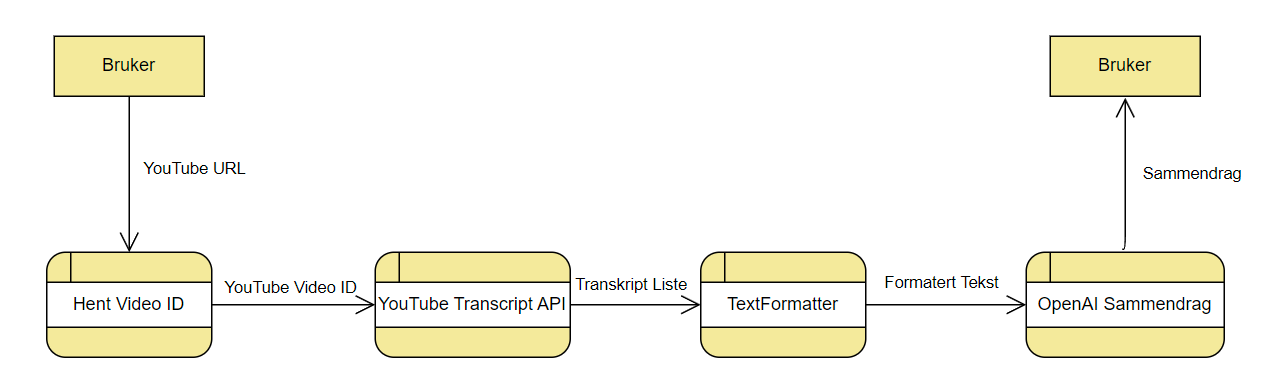

In [ ]:
summary = summarize("https://www.youtube.com/watch?v=gv9cdTh8cUo")

In [ ]:
summary

'. In summary, a class action lawsuit has been filed against AI image generator programs that scrape copyrighted images without permission. The suit claims that these programs commit copyright infringement on a massive scale and that the latent images they generate are reconstructions of the original copyrighted images. To determine whether this use is fair, courts must consider four factors related to the purpose, nature, amount, and market affect of the use. The two most relevant cases in determining this are Perfect 10 vs Google and Authors Guild vs Google. A finding of fair use would have far-reaching consequences for AI technology, and ultimately both the art and tech industries must work together to find a middle ground.'

#Setup gradio


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import gradio as gr

In [ ]:
examples = [
    "https://www.youtube.com/watch?v=wD79NZroV88",
    "https://www.youtube.com/watch?v=de2Hsvxaf8M&t=50s",
    "https://www.youtube.com/watch?v=JT8f0n6E79g&ab_channel=Coffeezilla",
    "https://youtu.be/gv9cdTh8cUo"
]

description = "Enter a link for a YouTube video you want summarized"

In [ ]:
gr.Interface(fn=summarize,
             inputs="text",
             outputs=["textbox"], 
             description=description,
             examples=examples
             ).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f4073eb2-baa6-4914.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Some videos that are too long, or have to many words spoken will give an error. This is due to the max length of the prompt using the OpenAI Davinci api being 4000 "tokens"

Works only on videos with English subtitles right now

Some words are off, like "dollie" instead of "DALL-E",  this is due to transcription mistakes from the automatic transcription through YouTube, in some cases ChatGPT will actualy correct this type of error but Davinci does not

Example: Using the same prompt on Davinci and on ChatGPT

In [ ]:
text = transcriptToText(YouTubeTranscriptApi.get_transcript('gv9cdTh8cUo'))

In [ ]:
print("Summarize this in 200 words or less:\n\n" + text)

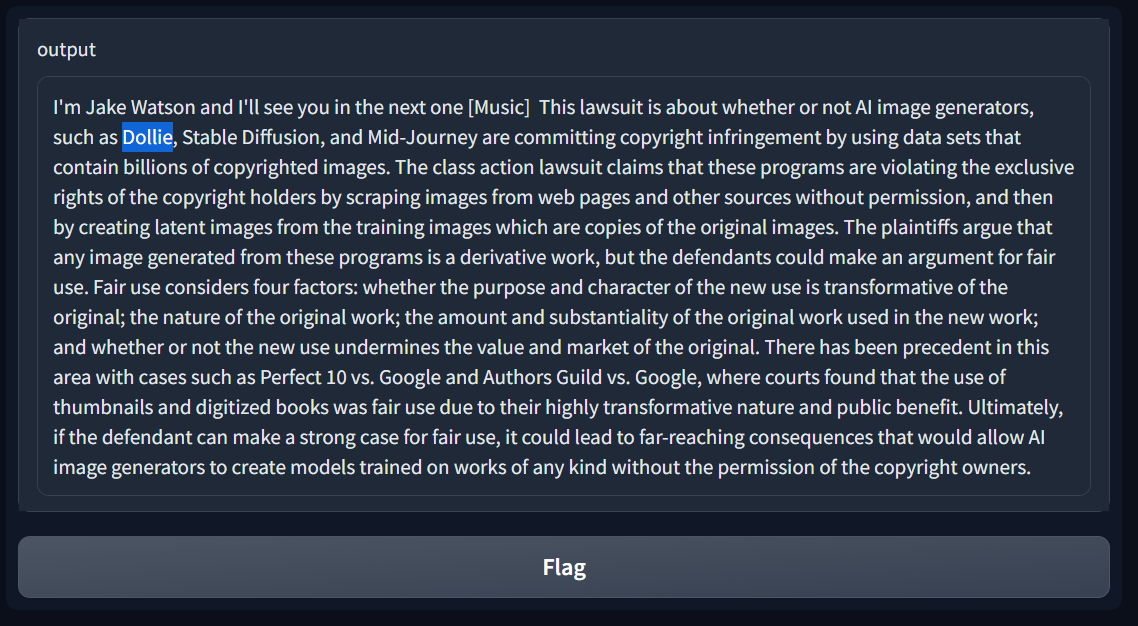

ChatGPT will take the context of the transacipt and assume that it is "DALL-E" since the rest of the transcript is obviously about AI image generation, and not "Dollie"

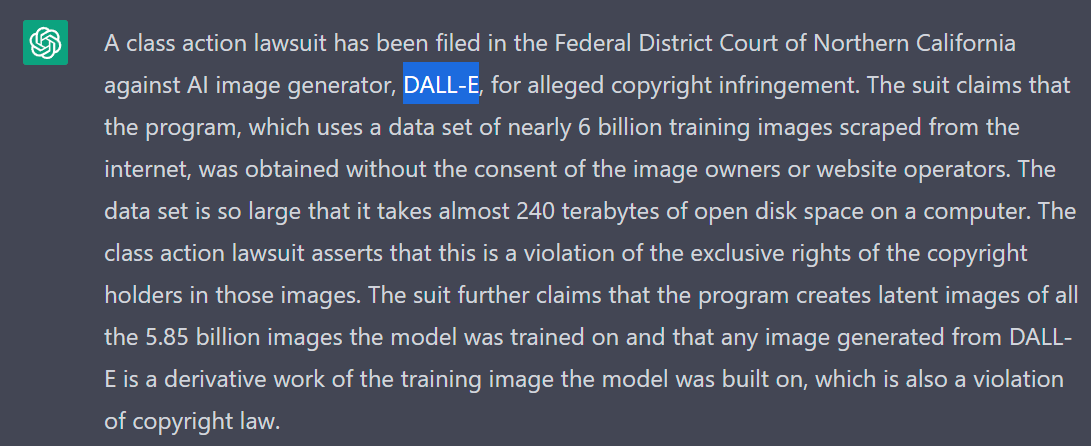

Some transcripts includes text like "[Music]" when music is played, this also may mess up the summary

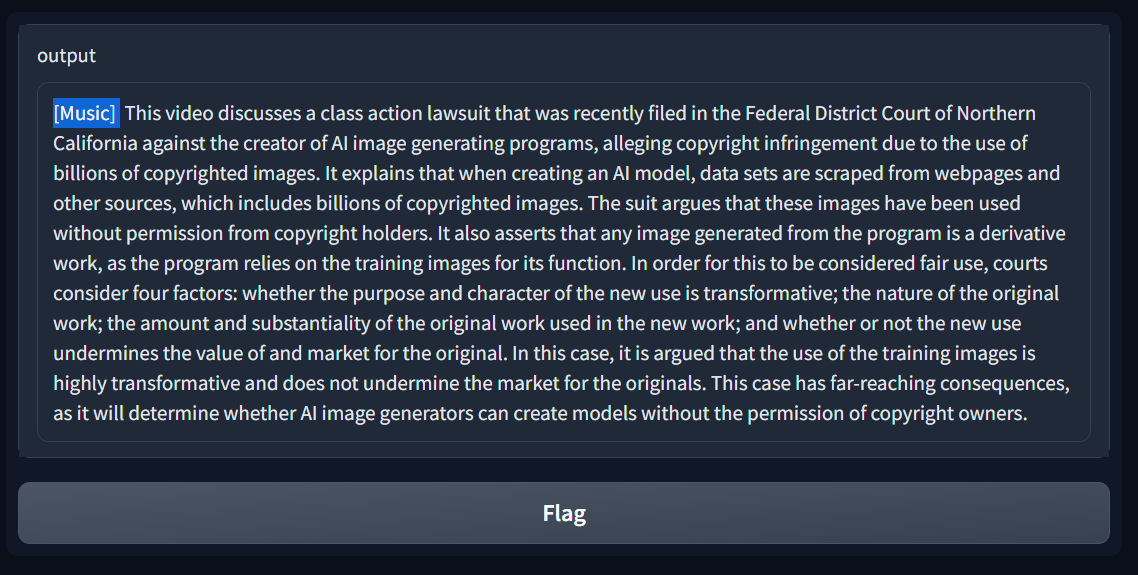

Could be done in different ways, like downloading just the audio (using youtube-dl api) and running wisper on it may fetch a better transcript and would also work on more languages than english